In [956]:
from madgwickahrs import * 
from quaternion import Quaternion
from conversion import * 
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
import matplotlib.dates as mdates
import matplotlib.patches as mpatches
from scipy.stats import norm
import time
from IPython.display import Image as ImageDisp
from sympy import Symbol, symbols, Matrix, sin, cos, latex#, Plot
from sympy.interactive import printing
printing.init_printing()
%pylab inline --no-import-all


Populating the interactive namespace from numpy and matplotlib


In [957]:
def conj(q):
    return [q[0], -q[1], -q[2], -q[3]]

def to_euler_angles(self):
    pitch = np.arcsin(2 * self[1] * self[2] + 2 * self[0] * self[3])
    if np.abs(self[1] * self[2] + self[3] * self[0] - 0.5) < 1e-8:
        roll = 0
        yaw = 2 * np.arctan2(self[1], self[0])
    elif np.abs(self[1] * self[2] + self[3] * self[0] + 0.5) < 1e-8:
        roll = -2 * np.arctan2(self[1], self[0])
        yaw = 0
    else:
        roll = np.arctan2(2 * self[0] * self[1] - 2 * self[2] * self[3], 1 - 2 * self[1] ** 2 - 2 * self[3] ** 2)
        yaw = np.arctan2(2 * self[0] * self[2] - 2 * self[1] * self[3], 1 - 2 * self[2] ** 2 - 2 * self[3] ** 2)
    return roll, pitch, yaw

## Real Data

In [958]:
short_len = 2878


In [959]:
# dt = 0.0001
# file_object  = open("trajectory_blender_20_0001.txt","r")

dt = 0.025
# file_object  = open("trajectory_blender_390_025.txt","r")
file_object = open("trajectory_blender_80f_025.txt","r")

px = []
py = []
pz = []
vx = []
vy = []
vz = []
time = []
Ax = []
Ay = []
Az = []

count = 0 
for i in file_object:
    if count > short_len: 
        pass
    else:
        sp = i.split()
        time.append(sp[0])
        px.append(float(sp[1]))
        py.append(float(sp[2]))
        pz.append(float(sp[3]))
        vx.append(float(sp[4]))
        vy.append(float(sp[5]))
        vz.append(float(sp[6]))
        Ax.append(float(sp[7]))
        Ay.append(float(sp[8]))
        Az.append(float(sp[9]))
    count = count + 1
    

print(len(Ax))



2879


In [960]:
def calculateVelocity(p):
    vel = []
    for i in range(len(p)):
        if i == 0: 
            pass
        else: 
            vel.append((p[i]-p[i-1])/dt)
    return vel

def calculateAcceleration(v):
    acc = []
    for i in range(len(v)):
        if i ==0:
            pass
        else:
            acc.append((v[i]-v[i-1])/dt)
    return acc

# VX = calculateVelocity(px)
# AX = calculateAcceleration(vx)


def calculateVfromA(a, v0): 
    vel = []
    v = v0
    vel.append(v)
    for i in range(len(a)):
        v = v + a[i]*dt
        vel.append(v)
    
    return vel

def calculatePfromV(v, p0):
    pos = []
    p = p0
    pos.append(p)
    for i in range(len(v)):
        p = p + v[i]*dt
        pos.append(p)
        

    return pos



In [961]:
# vx0 = vx[0]
# vy0 = vy[0]
# vz0 = vz[0]

# px0 = px[0]
# py0 = py[0]
# pz0 = pz[0]


# print(px[0:10])

# print(vx[0:10])


# vX = calculateVfromA(Ax, vx0)

# print(vX[0:10])

[-2.23568818225, -2.1881422577, -2.14063104086, -2.09315023416, -2.04569542721]
[1.90258722168, 1.90111457508, 1.89981142988, 1.89868251622, 1.89773212866]
[1.90258722168, 1.9010315099829573, 1.8996427894291348, 1.8984260079430997, 1.8973856778700997]


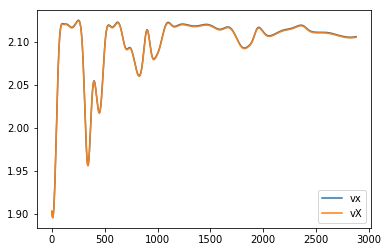

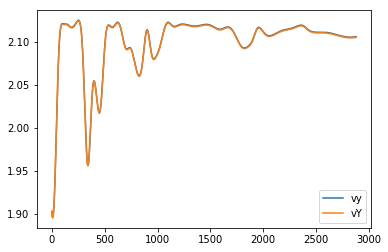

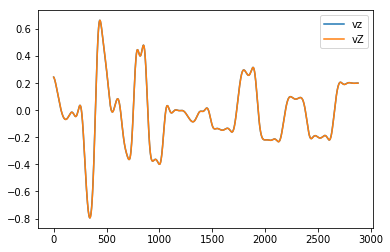

-2.23568818225
-2.23568818225
1.30679992339
1.30679992339


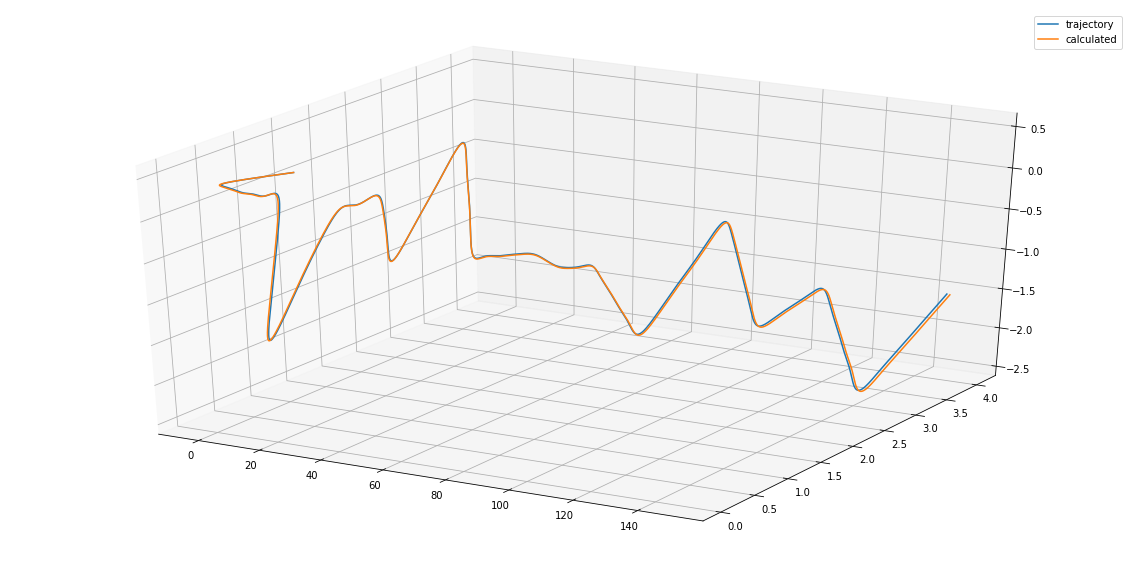

In [962]:
vx0 = vx[0]
vy0 = vy[0]
vz0 = vz[0]

px0 = px[0]
py0 = py[0]
pz0 = pz[0]


print(px[0:5])

print(vx[0:5])


vX = calculateVfromA(Ax, vx0)

print(vX[0:5])
vY = calculateVfromA(Ay, vy0)
vZ = calculateVfromA(Az, vz0)
plt.plot(vx)
plt.plot(vX)
plt.legend(["vx", "vX"])
plt.show()
plt.plot(vx)
plt.plot(vX)
plt.legend(["vy", "vY"])
plt.show()
plt.plot(vz)
plt.plot(vZ)
plt.legend(["vz", "vZ"])
plt.show()


pX = calculatePfromV(vX, px0)
pY = calculatePfromV(vY, py0)
pZ = calculatePfromV(vZ, pz0)
# plt.plot(px)
# plt.plot(pX)
# plt.show()
# plt.plot(py)
# plt.plot(pY)
# plt.show()
# plt.plot(pz)
# plt.plot(pZ)
# plt.show()
    
print(px[0])
print(pX[0])
print(py[0])
print(pY[0])
    
fig = plt.figure(figsize=(20,10))
axplot = fig.gca(projection='3d')
axplot.plot(px, py, pz, label='trajectory')
axplot.plot(pX, pY, pZ, label='calculated')
axplot.legend()

plt.show()


    
# def calculateVelocityfromAcceleration(a): 
    

## IMU Data

In [963]:
# file_object = open("imu_values_blender_20_0001.txt","r")
# file_object = open("imu_values_blender_390_025.txt","r")
file_object = open("imu_values_blender_80f_025.txt","r")


ax = []
ay = []
az = []
gx = []
gy = []
gz = []
magx = []
magy = []
magz = []

count = 0
for i in file_object:
    if count > short_len:
        pass
    else: 
        sp = i.split()
        ax.append(float(sp[1]))
        ay.append(float(sp[2]))
        az.append(float(sp[3]))
        gx.append(float(sp[4]))
        gy.append(float(sp[5]))
        gz.append(float(sp[6]))
        magx.append(float(sp[7]))
        magy.append(float(sp[8]))
        magz.append(float(sp[9]))
    count = count + 1

print(len(ax))
    
Acc = np.hstack([np.array(ax)[np.newaxis].T, np.array(ay)[np.newaxis].T, np.array(az)[np.newaxis].T])
Gyro = np.hstack([np.array(gx)[np.newaxis].T, np.array(gy)[np.newaxis].T, np.array(gz)[np.newaxis].T])
Mag = np.hstack([np.array(magx)[np.newaxis].T, np.array(magy)[np.newaxis].T, np.array(magz)[np.newaxis].T])


2879


In [964]:
print()

In [965]:
print(ax[0])
print(ay[0])
print(az[0])

-0.0562683243013
-0.730436987436
-9.83597362495


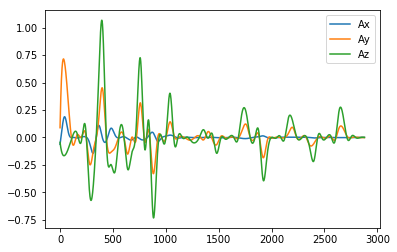

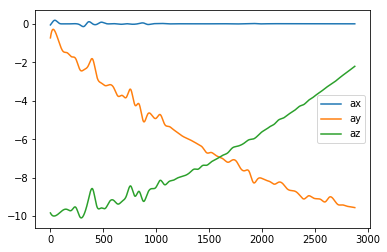

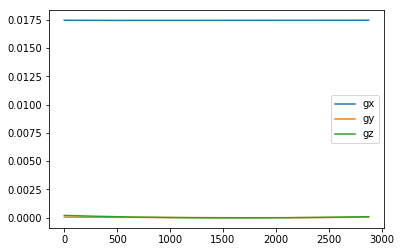

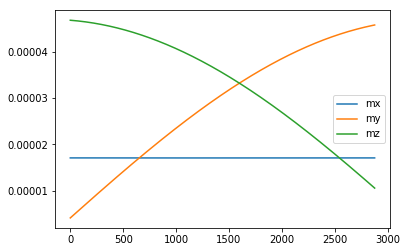

In [966]:
plt.plot(Ax)
plt.plot(Ay)
plt.plot(Az)
plt.legend(["Ax","Ay","Az"])
plt.show()
plt.plot(ax)
plt.plot(ay)
plt.plot(az)
plt.legend(["ax","ay","az"])
plt.show()
plt.plot(gx)
plt.plot(gy)
plt.plot(gz)
plt.legend(["gx","gy","gz"])
plt.show()
plt.plot(magx)
plt.plot(magy)
plt.plot(magz)
plt.legend(["mx","my","mz"])
plt.show()


In [967]:
## TODO:  yprchange
rollrate = np.array(gx)
pitchrate = np.array(gy)
yawrate = np.array(gz)
print(len(rollrate))

2879


## AHRS

In [968]:

sampleperiod = dt

rot_mat = []
Imupredict = MadgwickAHRS()
Imupredict.sampleperiod = sampleperiod
roll = []
pitch = []
yaw = []

for i in range(len(ax)):
    Imupredict.update(Gyro[i], Acc[i], Mag[i])
#     Imupredict.update_imu(Gyro[i], Acc[i])
    q = Imupredict.quaternion
#     rot_mat.append( np.transpose(quaterniontorotmatrix(q)))

    rot_mat.append( quaterniontorotmatrix(q))

    q1 = conj(q)
    q2 = to_euler_angles(q1)
    roll.append(q2[0])
    pitch.append(q2[1])
    yaw.append(q2[2])
#     roll.append(q2[0]*180/math.pi)
#     pitch.append(q2[1]*180/math.pi)
#     yaw.append(q2[2]*180/math.pi)
    
#     print(np.transpose(quaterniontorotmatrix(q)))



In [969]:
# rot_mat = []

# for i in range(len(ax)):
#     rot_mat.append(np.mat([[1,0,0],[0,1,0],[0,0,1]]))


In [970]:
Earth_acc = []
Ex = []
Ey = []
Ez = []
for i in range(len(Acc)):
    Earth_acc.append(rot_mat[i]*np.transpose([Acc[i]]))
    mat = np.array(rot_mat[i]*np.transpose([Acc[i]]))
#     print(mat[0][0], mat[1][0], mat[2][0])
    Ex.append(mat[0][0])
    Ey.append(mat[1][0])
    Ez.append(mat[2][0])

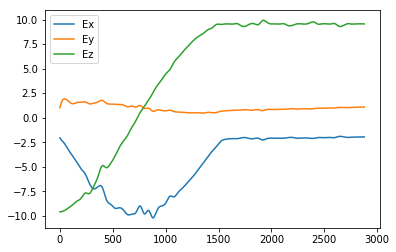

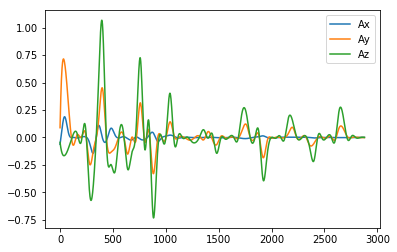

[0.0174640892964, 0.0174640380513]
[-2.0448971451907743, -2.0650345005611572]
[-0.0622284678817, -0.0555488221529]
[1.0140552839285402, 1.0635438422377743]
[0.0888370012358, 0.133914059144]
[-9.595476487093986, -9.594003148067191]
[-0.0445178726591, -0.0521530519836]


In [971]:

plt.plot(Ex)
# plt.plot(ax)
plt.plot(Ey)
# plt.plot(ay)
# plt.show()
plt.plot(Ez)
# plt.plot(az)
plt.legend(["Ex","Ey","Ez"])
plt.show()

plt.plot(Ax)
plt.plot(Ay)
plt.plot(Az)
plt.legend(["Ax","Ay","Az"])
plt.show()


print(gx[0:2])
print(Ex[0:2])
print(Ax[0:2])
print(Ey[0:2])
print(Ay[0:2])
print(Ez[0:2])
print(Az[0:2])

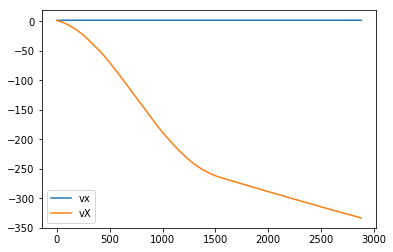

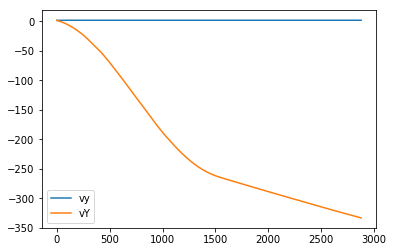

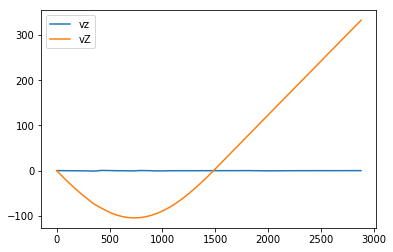

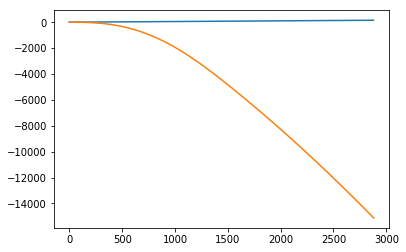

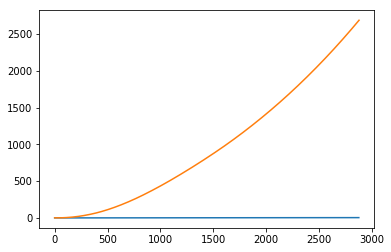

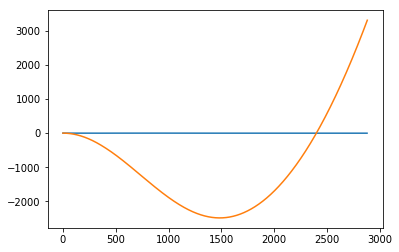

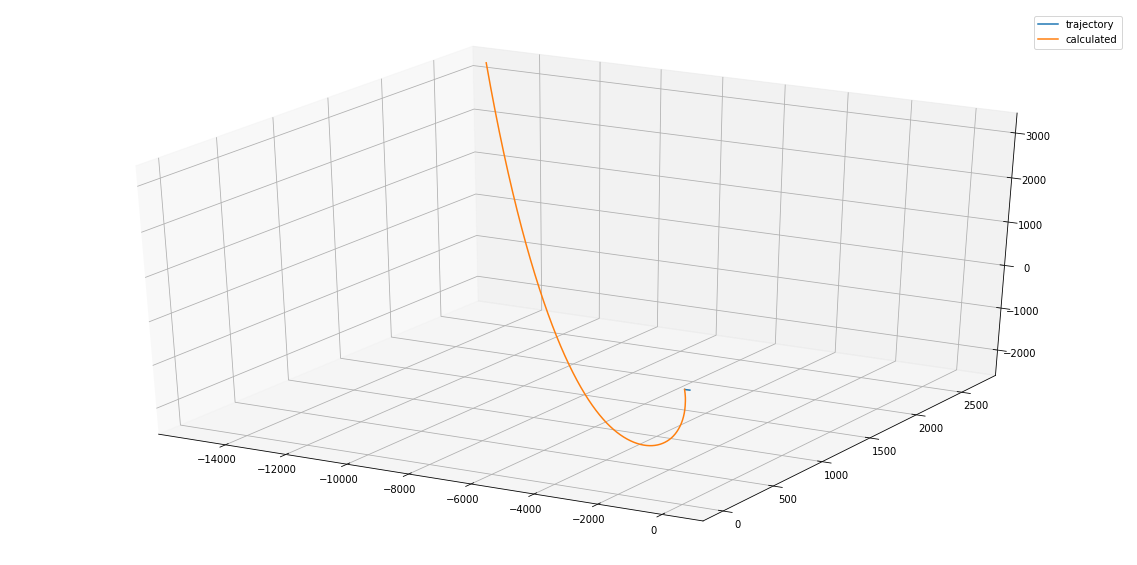

In [972]:
vX = calculateVfromA(Ex, vx0)
vY = calculateVfromA(Ey, vy0)
vZ = calculateVfromA(Ez, vz0)
plt.plot(vx)
plt.plot(vX)
plt.legend(["vx", "vX"])
plt.show()
plt.plot(vx)
plt.plot(vX)
plt.legend(["vy", "vY"])
plt.show()
plt.plot(vz)
plt.plot(vZ)
plt.legend(["vz", "vZ"])
plt.show()


pX = calculatePfromV(vX, px0)
pY = calculatePfromV(vY, py0)
pZ = calculatePfromV(vZ, pz0)
plt.plot(px)
plt.plot(pX)
plt.show()
plt.plot(py)
plt.plot(pY)
plt.show()
plt.plot(pz)
plt.plot(pZ)
plt.show()
    
    
fig = plt.figure(figsize=(20,10))
axplot = fig.gca(projection='3d')
axplot.plot( px, py, pz, label='trajectory')
axplot.plot( pX, pY, pZ, label='calculated')
axplot.legend()

plt.show()

# plt.plot(px,py)
# plt.plot(pX,pY)

# print(px[0])
# print(py[0])

# print(pX[0])
# print(pY[0])

In [973]:

numstates = 8

# Kalman Filter Design

In [974]:
print(max(Ax))
print(max(Ay))
print(max(rollrate)*180/np.pi) #gx in rad/s
print(max(pitchrate)) #gy in rad/s
print(max(yawrate)) #gz in rad/s

0.188854030749
0.715592583635
1.0007391135879928
5.31576607802e-05
0.000197133275947


## Q: Process Noise

In [975]:
jerkmax = 300.0    # m/s3
pitchrateaccmax=  200.0 *np.pi/180.0 # rad/s2
rollrateaccmax =  200.0 *np.pi/180.0 # rad/s2
yawrateaccmax  =  80.0  *np.pi/180.0 # rad/s2

Q = np.diagflat([[(dt * jerkmax)/100],            # acceleration
                 [(dt * jerkmax)/100],            # acceleration
            [(dt * yawrateaccmax)/100],           # yawrate
            [(dt * pitchrateaccmax)/100],         # pitchrate
            [(dt * rollrateaccmax)/100]])         # rollrate





# Q = np.diagflat([[6],            # acceleration
#             [6],
#             [(0.028)**2],           # yawrate
#             [(0.070)**2],         # pitchrate
#             [(0.070)**2]])         # rollrate

[0, 0.04754592455000006, 0.04751121684000026, 0.04748080669999988, 0.04745480694999982]


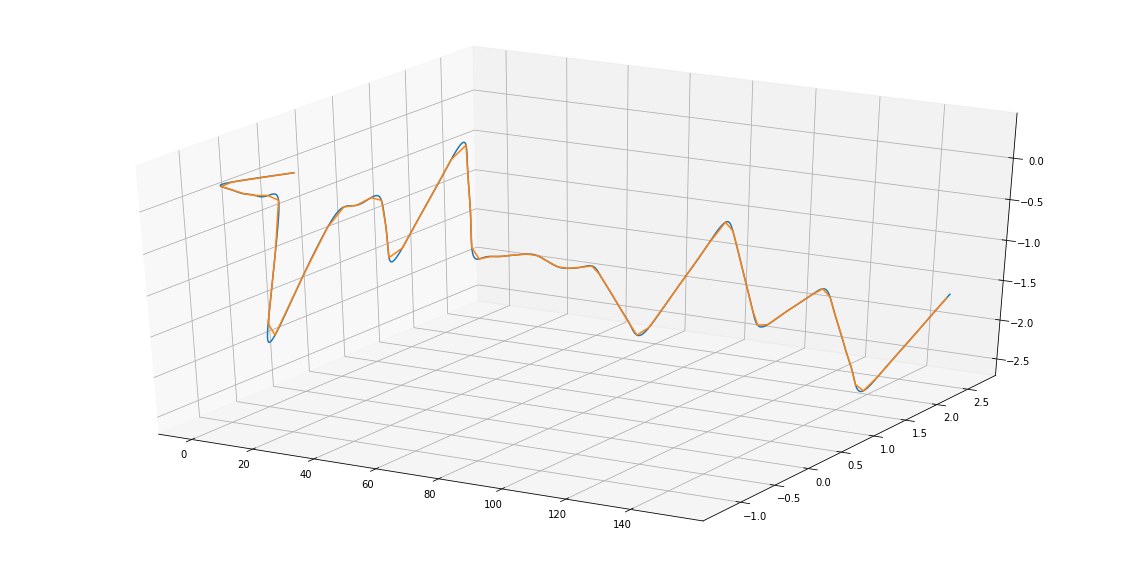

In [976]:
dx = []
dy = []
dz = []


for i in range(len(px)):
    if i ==0:
        dx.append(0)
        dy.append(0)
        dz.append(0)
    else:
        dx.append(px[i]-px[i-1])
        dy.append(py[i]-py[i-1])
        dz.append(pz[i]-pz[i-1])

        
print(dx[0:5])


mx = np.cumsum(dx)
my = np.cumsum(dy)
mz = np.cumsum(dz)


# count = 0
# mx2 = []
# storex = 0
# my2 = []
# storey = 0
# mz2 = []
# storez = 0
# for i in range(len (mx)):
#     if count == 0:
#         storex = mx[i]
#         storey = my[i]
#         storez = mz[i]
#         mx2.append(storex)
#         my2.append(storey)
#         mz2.append(storez)
#         count = 40
#     else: 
#         mx2.append(storex)
#         my2.append(storey)
#         mz2.append(storez)
#         count = count -1 
        
# print(mx2[0:5])
# print(my2[0:5])
# print(mz2[0:5])

# mx = mx2
# my = my2
# mz = mz2


    


ds = np.sqrt(np.array(dx)**2 + np.array(dy)**2 + np.array(dz)**2)

# print(np.diff(ds[0:500]))
# GPS = ds.astype('bool')

GPS=np.hstack((True, (abs(np.diff(ds))>0.0).astype('bool'))) # GPS Trigger for Kalman Filter

# print(len(px))
# print(len(ax))
# print(len(dx))
# print(len(mx))
# print(len(GPS))
# print(dx[0:5])
# print(mx[0:5])

# print(np.diff(ds))
# print(np.diff(ds)<0)

    
fig = plt.figure(figsize=(20,10))
axplot = fig.gca(projection='3d')
axplot.plot(mx, my, mz)
axplot.plot(mx2, my2, mz2)


plt.show()

In [977]:
# dx = []
# dy = []
# dz = []
# for i in range(len(px)):
#     if i ==0:
#         dx.append(0)
#         dy.append(0)
#         dz.append(0)
#     else:
#         dx.append(px[i]-px[i-1])
#         dy.append(py[i]-py[i-1])
#         dz.append(pz[i]-pz[i-1])


# mx = np.cumsum(dx)
# my = np.cumsum(dy)
# mz = np.cumsum(dz)

# ds = np.sqrt(np.array(dx)**2 + np.array(dy)**2 + np.array(dz)**2)

# GPS=np.hstack((True, (np.diff(ds)>0.0).astype('bool'))) # GPS Trigger for Kalman Filter
# # print(len(px))
# # print(len(ax))
# # print(len(dx))
# # print(len(mx))
# # print(len(GPS))
# # print(dx[0:5])
# # print(mx[0:5])

    
# fig = plt.figure(figsize=(20,10))
# axplot = fig.gca(projection='3d')
# axplot.plot(mx, my, mz)
# axplot.legend()

# plt.show()

In [978]:
print(max(dx))
print(max(dy))
print(max(dz))
print(min(dz))
print(min(vx))
print(max(vy))
print(min(pitch))
print(max(pitch))
print(min(pitchrate))
print(max(pitchrate))

0.05313395539999988
0.00866553779000001
0.01662494280600002
-0.019866633551000046
1.89577790114
0.346669783719
-0.17529060964727022
0.7764294734753386
-4.27781657923e-06
5.31576607802e-05


## R: Measurement Noise Covariance
## TODO: R could be different

In [979]:
R = np.diagflat([[(0.0004)**2],      # x
            [(0.0004)**2],           # y
            [(0.0004)**2],           # z
            [(0.001)**2],  # vx
            [(0.001)**2],
            [(0.005)**2],  # heading 
            [(0.005)**2],  # pitch
            [(0.005)**2]]) # roll


# R = np.diagflat([[(5.0)**2],      # x
#             [(5.0)**2],           # y
#             [(5.0)**2],           # y
#             [(10.0)**2],  # v
#             [(10.0)**2],  # v
#             [(0.5)**2],  # heading 
#             [(0.5)**2],  # pitch
#             [(0.5)**2]]) # roll

In [980]:
# speed = np.array(vx)
# print(len(vx))
# print(len(ax))

In [981]:
## Change these values 

In [982]:
# epe = (np.zeros(np.shape(ax))+1)*3

# epsilon = 0.1
# xi      = 500.0
# zeta    = 50.0
# spspeedx=xi/((np.array(vx)/1.0)+epsilon)
# spspeedy=xi/((np.array(vy)/1.0)+epsilon)

# spepe=zeta*epe
# spx = (spspeedx)**2 + (spepe)**2
# spy = (spspeedy)**2 + (spepe)**2


# print(spspeedx)
# print(spspeedy)
# print(spx)
# print(spy)



In [983]:
az = np.array(az)
ax = np.array(ax)
ay = np.array(ay)

rho = 200.0
gamma=500.0

sroll = (rho + gamma*ay)**2
spitch= (rho + gamma*ax)**2
syaw = (rho + gamma*az)**2

print(sroll)
print(spitch)

[2.72971507e+04 2.13905885e+04 1.64577265e+04 ... 2.09555922e+07
 2.09607168e+07 2.09658547e+07]
[29537.86621966 30714.62901767 31947.58242848 ... 40245.89626575
 40246.82432164 40247.75220387]


## I

In [984]:
I = np.eye(numstates)
print(I, I.shape)

[[1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]] (8, 8)


In [985]:
vxs, vys, vzs, psis, dpsis, dts, xs, ys, zs, axs, ays, azs, phis, dphis, thetas, dthetas, Lats, Lons = \
 symbols('v_x, v_y, v_z \psi \dot\psi T x y z a_x, a_y, a_z, \phi \dot\phi \Theta \dot\Theta Lat Lon')

As = Matrix([[xs+(vxs/dpsis)*(sin(psis+dpsis*dts)-sin(psis))],
             [ys+((vxs/dpsis)*(-cos(psis+dpsis*dts)+cos(psis))) + ((vys/dphis)*(sin(phis+dphis*dts)-sin(phis)))],
             [zs+(vys/dphis)*(-cos(phis+dphis*dts)+cos(phis))],
             [vxs + axs*dts],
             [vys + ays*dts],
             [psis+dpsis*dts],
             [thetas+dthetas*dts],
             [phis+dphis*dts]])
state = Matrix([xs,ys,zs,vxs,vys,psis,thetas,phis])

In [986]:
As

⎡                         vₓ⋅(-sin(\psi) + sin(T⋅\dot\psi + \psi))            
⎢                     x + ────────────────────────────────────────            
⎢                                         \dot\psi                            
⎢                                                                             
⎢    vₓ⋅(cos(\psi) - cos(T⋅\dot\psi + \psi))   v_y⋅(-sin(\phi) + sin(T⋅\dot\ph
⎢y + ─────────────────────────────────────── + ───────────────────────────────
⎢                    \dot\psi                                   \dot\phi      
⎢                                                                             
⎢                         v_y⋅(cos(\phi) - cos(T⋅\dot\phi + \phi))            
⎢                     z + ────────────────────────────────────────            
⎢                                         \dot\phi                            
⎢                                                                             
⎢                                       T⋅aₓ + vₓ   

In [987]:
state

⎡  x   ⎤
⎢      ⎥
⎢  y   ⎥
⎢      ⎥
⎢  z   ⎥
⎢      ⎥
⎢  vₓ  ⎥
⎢      ⎥
⎢ v_y  ⎥
⎢      ⎥
⎢ \psi ⎥
⎢      ⎥
⎢\Theta⎥
⎢      ⎥
⎣ \phi ⎦

## Jacobian of dynamic matrix with respect to state

In [988]:
As.jacobian(state)

⎡         -sin(\psi) + sin(T⋅\dot\psi + \psi)                                 
⎢1  0  0  ───────────────────────────────────                   0             
⎢                       \dot\psi                                              
⎢                                                                             
⎢         cos(\psi) - cos(T⋅\dot\psi + \psi)   -sin(\phi) + sin(T⋅\dot\phi + \
⎢0  1  0  ──────────────────────────────────   ───────────────────────────────
⎢                      \dot\psi                              \dot\phi         
⎢                                                                             
⎢                                              cos(\phi) - cos(T⋅\dot\phi + \p
⎢0  0  1                   0                   ───────────────────────────────
⎢                                                           \dot\phi          
⎢                                                                             
⎢0  0  0                   1                        

## Control input

In [989]:
control = Matrix([axs, ays, dpsis, dthetas,dphis ])
control

⎡    aₓ    ⎤
⎢          ⎥
⎢   a_y    ⎥
⎢          ⎥
⎢ \dot\psi ⎥
⎢          ⎥
⎢\dot\Theta⎥
⎢          ⎥
⎣ \dot\phi ⎦

## Jacobian of the Dynamic Matirx with respect to the control input

In [990]:
JGs = As.jacobian(control)
JGs

⎡      T⋅vₓ⋅cos(T⋅\dot\psi + \psi)   vₓ⋅(-sin(\psi) + sin(T⋅\dot\psi + \psi)) 
⎢0  0  ─────────────────────────── - ──────────────────────────────────────── 
⎢                \dot\psi                                   2                 
⎢                                                   \dot\psi                  
⎢                                                                             
⎢      T⋅vₓ⋅sin(T⋅\dot\psi + \psi)   vₓ⋅(cos(\psi) - cos(T⋅\dot\psi + \psi))  
⎢0  0  ─────────────────────────── - ───────────────────────────────────────  
⎢                \dot\psi                                   2                 
⎢                                                   \dot\psi                  
⎢                                                                             
⎢                                                                             
⎢0  0                                    0                                    
⎢                                                   

In [991]:
hs = Matrix([[xs],[ys],[zs],[vxs],[vys],[psis],[thetas],[phis]])
Hs=hs.jacobian(state)
Hs

⎡1  0  0  0  0  0  0  0⎤
⎢                      ⎥
⎢0  1  0  0  0  0  0  0⎥
⎢                      ⎥
⎢0  0  1  0  0  0  0  0⎥
⎢                      ⎥
⎢0  0  0  1  0  0  0  0⎥
⎢                      ⎥
⎢0  0  0  0  1  0  0  0⎥
⎢                      ⎥
⎢0  0  0  0  0  1  0  0⎥
⎢                      ⎥
⎢0  0  0  0  0  0  1  0⎥
⎢                      ⎥
⎣0  0  0  0  0  0  0  1⎦

## Initial State

[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 [ 1.90258722]
 [-1.09069013]
 [ 0.        ]
 [ 0.        ]
 [ 0.        ]] (8, 1)


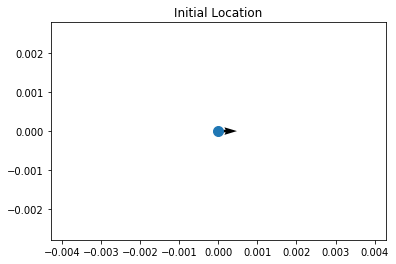

In [992]:
x = np.matrix([[mx[0], my[0], mz[0], vx[0]/1.0, vy[0]/1.0, 0.0, 0.0, 0.0]]).T
print(x, x.shape)

U=float(np.cos(x[5])*x[3])
V=float(np.sin(x[5])*x[3])

plt.quiver(x[0], x[1], U, V)
plt.scatter(float(x[0]), float(x[1]), s=100)
plt.title('Initial Location')
plt.axis('equal')

## Initial Uncertainty

In [993]:
## TODO: see how this value changes the result
P = 1e-4*np.eye(numstates)
print(P)

# P = np.array([[1e-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0],
#               [0.0,1e-4,0.0,0.0,0.0,0.0,0.0,0.0],
#               [0.0,0.0,1e-4,0.0,0.0,0.0,0.0,0.0],
#               [0.0,0.0,0.0,1e-4,0.0,0.0,0.0,0.0],
#               [0.0,0.0,0.0,0.0,1e-4,0.0,0.0,0.0],
#               [0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0],
#               [0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0],
#               [0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0]])

print(P)
    

[[0.0001 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0001 0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0001 0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0001 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.0001 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0001 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.0001 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.0001]]
[[0.0001 0.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.0001 0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.0001 0.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.0001 0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.0001 0.     0.     0.    ]
 [0.     0.     0.     0.     0.     0.0001 0.     0.    ]
 [0.     0.     0.     0.     0.     0.     0.0001 0.    ]
 [0.     0.     0.     0.     0.     0.     0.     0.0001]]


## Measurement Vector

In [994]:
mx = np.array(mx)
my = np.array(my)
mz = np.array(mz)

vx = np.array(vx)
vy = np.array(vy)
yaw = np.array(yaw)
pitch = np.array(pitch)
roll = np.array(roll)

measurements = np.vstack((mx, my, mz, \
                          vx/1.0, \
                          vy/1.0, \
                          yaw, \
                          pitch, \
                          roll))

# Lenth of the measurement
m = measurements.shape[1]
print(measurements.shape)

(8, 2879)


In [995]:
# Preallocation for Plotting
x0 = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
x7 = []
x8 = []
Zx = []
Zy = []
P0 = []
P1 = []
P2 = []
P3 = []
P4 = []
P5 = []
P6 = []
P7 = []
P8 = []
K0 = []
K1 = []
K2 = []
K3 = []
K4 = []
K5 = []
K6 = []
K7 = []
dstate=[]

h0 = []
h1 = []
h2 = []

In [996]:
print(mx[0])
print(my[0])
print(mz[0])
print(x[0])
print(x[1])
print(x[2])
print(measurements[0])
print(m)
ri = short_len
x0.append(float(x[0]))
x1.append(float(x[1]))
x2.append(float(x[2]))
print(x0)
print(x1)
print(x2)
h0.append(x[0])
h1.append(x[1])
h2.append(x[2])

0.0
0.0
0.0
[[0.]]
[[0.]]
[[0.]]
[0.00000000e+00 4.75459246e-02 9.50571414e-02 ... 1.51033618e+02
 1.51086273e+02 1.51138929e+02]
2879
[0.0]
[0.0]
[0.0]


In [997]:

for filterstep in range(ri):

    axc = ax[filterstep]
    ayc = ay[filterstep]
    yawc = yawrate[filterstep]
    pitc = pitchrate[filterstep]
    rolc = rollrate[filterstep]    
    
#     print("old")
#     print(x[0])
#     print(x[1])
#     print(x[2])
    
    if yawc==0.0: # Driving straight
        x[0] = x[0] + x[3]*dt * np.cos(x[5])
        x[1] = x[1] + x[3]*dt * np.sin(x[5]) + x[4]*dt * np.cos(x[7])  
        x[2] = x[2] + x[4]*dt * np.sin(x[7])
        x[3] = x[3] + axc*dt
        x[4] = x[4] + ayc*dt
        x[5] = x[5] + yawc*dt
        x[6] = x[6] + pitc*dt
        x[7] = x[7] + rolc*dt
        yawc = 0.00000001 # to avoid numerical issues in Jacobians
        rolc = 0.00000001 # to avoid numerical issues in Jacobians
        dstate.append(0)
    else: # otherwise
        x[0] = x[0] + (x[3]/yawc) * (np.sin(yawc*dt+x[5]) - np.sin(x[5]))
        x[1] = x[1] + ((x[3]/yawc) * (-np.cos(yawc*dt+x[5])+ np.cos(x[5]))) + ((x[4]/rolc) * (np.sin(rolc*dt+x[7])- np.sin(x[7])))
        x[2] = x[2] + ((x[4]/rolc) * (-np.cos(rolc*dt+x[7])+ np.cos(x[7])))
        x[3] = x[3] + axc*dt
        x[4] = x[4] + ayc*dt
        x[4] = (x[4] + yawc*dt + np.pi) % (2.0*np.pi) - np.pi
        x[5] = x[5] + pitc*dt
        #x[6] = x[6] + rolc*dt
        x[6] = (x[6] + rolc*dt + np.pi) % (2.0*np.pi) - np.pi
        dstate.append(1)
#     print("predicted")
#     print(x[0]) 
#     print(x[1])
#     print(x[2])
    
    
    a14 = float((1.0/yawc) * (np.sin(yawc*dt+x[5]) - np.sin(x[5])))
    a16 = float((x[3]/yawc)* (np.cos(yawc*dt+x[5]) - np.cos(x[5])))
    a24 = float((1.0/yawc) * (-np.cos(yawc*dt+x[5]) + np.cos(x[5])))
    a25 = float((1.0/rolc) * (np.sin(rolc*dt+x[7]) - np.sin(x[7])))
    a26 = float((x[3]/yawc) * (np.sin(yawc*dt+x[5]) - np.sin(x[5])))
    a28 = float((x[4]/rolc)* (np.cos(rolc*dt+x[7]) - np.cos(x[7])))
    a35 = float((1/rolc)* (-np.cos(rolc*dt+x[7]) + np.cos(x[7])))
    a38 = float((x[4]/rolc)* (np.sin(rolc*dt+x[7]) - np.sin(x[7])))

    JA = np.matrix([[1.0, 0.0, 0.0, a14, 0.0, a16, 0.0, 0.0],
                  [0.0, 1.0, 0.0, a24, a25, a26, 0.0, a28],
                  [0.0, 0.0, 1.0, 0.0, a35, 0.0, 0.0, a38],
                  [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])
    
#     print(np.shape(JA))
    
    
    g13 = float((dt*x[3]/yawc)*np.cos(yawc*dt+x[5]) - (x[3]/yawc**2)*(np.sin(yawc*dt+x[5])-np.sin(x[5])))
    g23 = float((dt*x[3]/yawc)*np.sin(yawc*dt+x[5]) - (x[3]/yawc**2)*(-np.cos(yawc*dt+x[5])+np.cos(x[5])))
    g25 = float((dt*x[4]/rolc)*np.cos(rolc*dt+x[7]) - (x[4]/rolc**2)*(np.sin(rolc*dt+x[7])-np.sin(x[7])))
    g35 = float((dt*x[4]/rolc)*np.sin(rolc*dt+x[7]) - (x[4]/yawc**2)*(-np.cos(rolc*dt+x[7])+np.cos(x[7])))
                
    JG = np.matrix([[0.0, 0.0, g13, 0.0, 0.0],
                    [0.0, 0.0, g23, 0.0, g25],
                    [0.0, 0.0, 0.0, 0.0, g35],
                    [dt, 0.0, 0.0, 0.0, 0.0],
                    [0.0, dt, 0.0, 0.0, 0.0],
                    [0.0, 0.0, dt, 0.0, 0.0],
                    [0.0, 0.0, 0.0, dt, 0.0],
                    [0.0, 0.0, 0.0, 0.0, dt]])
    
    # Project the error covariance ahead
    #P = JA*P*JA.T + JG*Q*JG.T
    
#     print("predicted P")
#     print(P)
    
    
    # Measurement Update (Correction)
    # ===============================
    hx = np.matrix([[float(x[0])],
                    [float(x[1])],
                    [float(x[2])],                    
                    [float(x[3])],
                    [float(x[4])],
                    [float(x[5])],
                    [float(x[6])],
                    [float(x[7])]])
    # Because GPS is sampled with 10Hz and the other Measurements, as well as
    # the filter are sampled with 50Hz, one have to wait for correction until
    # there is a new GPS Measurement
    if GPS[filterstep]:
        print("GPS")
        # Calculate the Jacobian of the Measurement Function
        # see "Measurement Matrix H"
        JH = np.matrix([[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
                        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

        S = JH*P*JH.T + R    # R should be small and S should be small 

        K = (P*JH.T) * np.linalg.inv(S)

        # Update the estimate via
        z = measurements[:,filterstep].reshape(JH.shape[0],1)
        y = z - (hx)                         # Innovation or Residual
        x = x + (K*y)

        h0.append(z[0])
        h1.append(z[1])
        h2.append(z[2])

    #     # Update the error covariance
        #P = (I - (K*JH))*P


#     else:

#         JH = np.matrix([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
#                         [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0]])

    

    
# #     # Adaptive R
#     R[0,0] = spx[filterstep]       # x
#     R[1,1] = spy[filterstep]       # y
#     R[2,2] = spy[filterstep]
#     R[3,3] = spspeedx[filterstep]  # vx
#     R[4,4] = spspeedy[filterstep]
#     R[5,5] = syaw[filterstep]  # course
#     R[6,6] = spitch[filterstep]   # pitch
#     R[7,7] = sroll[filterstep]    # roll
    
    

#     print("P")
#     print(P)
#     if GPS[filterstep]:
#         x[0] = measurements[0][filterstep]
#         x[1] = measurements[1][filterstep]
#         x[2] = measurements[2][filterstep]
#         print("corrected")
#         print(x[0])
#         print(x[1])
#         print(x[2])
    
    
    x0.append(float(x[0]))
    x1.append(float(x[1]))
    x2.append(float(x[2]))
    x3.append(float(x[3]))
    x4.append(float(x[4]))
    x5.append(float(x[5]))
    x6.append(float(x[6]))
    x7.append(float(x[7]))
    P0.append(float(P[0,0]))
    P1.append(float(P[1,1]))
    P2.append(float(P[2,2]))
    P3.append(float(P[3,3]))
    P4.append(float(P[4,4]))
    P5.append(float(P[5,5]))
    P6.append(float(P[6,6]))
    P7.append(float(P[7,7]))
    K0.append(float(K[0,0]))
    K1.append(float(K[1,0]))
    K2.append(float(K[2,0]))
    K3.append(float(K[3,0]))
    K4.append(float(K[4,0]))
    K5.append(float(K[5,0]))
    K6.append(float(K[6,0]))
    K7.append(float(K[7,0]))
    
    
    
    
    

GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS


GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS
GPS


In [998]:
# num = 0
# print(mx[num])
# print(measurements[0][num])
# print(my[num])
# print(measurements[1][num])

# print(h0)
# print(mx)
# print(x0[0])
# print(x1[0])
# print(x2[0])

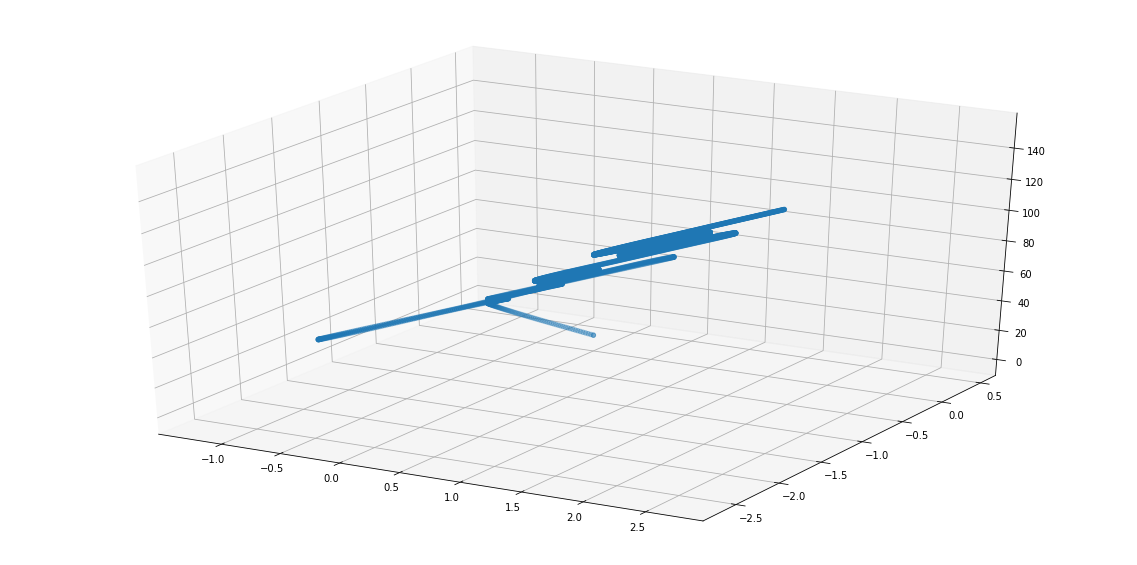

In [999]:
fig = plt.figure(figsize=(20,10))
axplot = fig.gca(projection='3d')
axplot.scatter( x1, x2, x0)
plt.show()

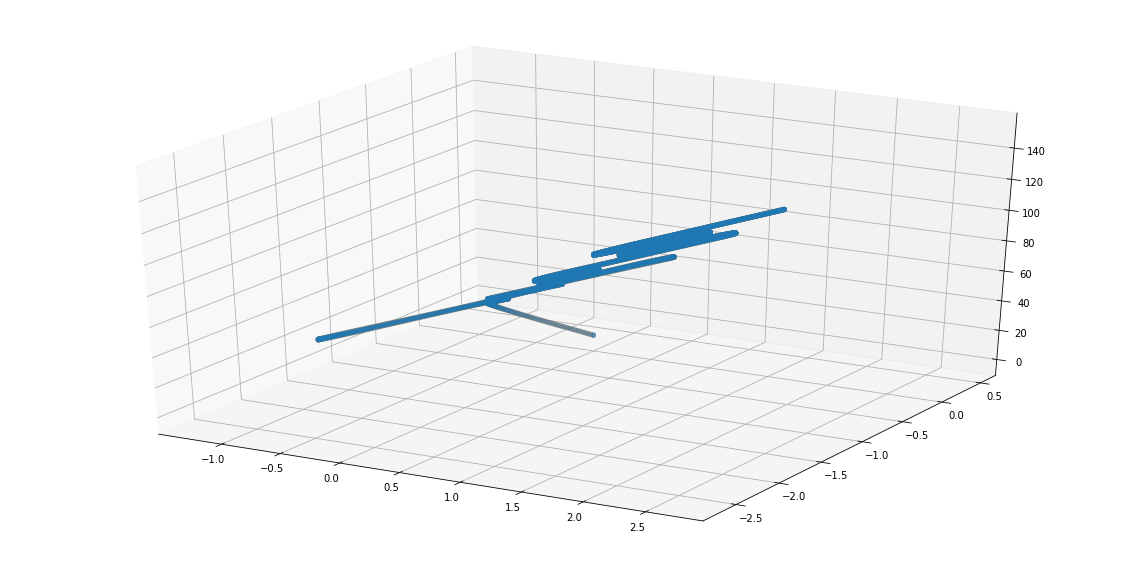

In [1009]:
# print(x0)
# print(x1)
# print(x2)
# print(mx[0:5])
# print(my[0:5])
# print(mz[0:5])

kx = mx[0:ri]
ky = my[0:ri]
kz = mz[0:ri]

fig = plt.figure(figsize=(20,10))
axplot = fig.gca(projection='3d')
axplot.scatter( x1, x2, x0)
axplot.scatter( ky, kz, kx)
# axplot.plot(x0, x1, x2, label='trajectory')
# axplot.plot(h0, h1, h2)
# axplot.plot(kx, ky, kz)


# axplot.legend()

plt.show()




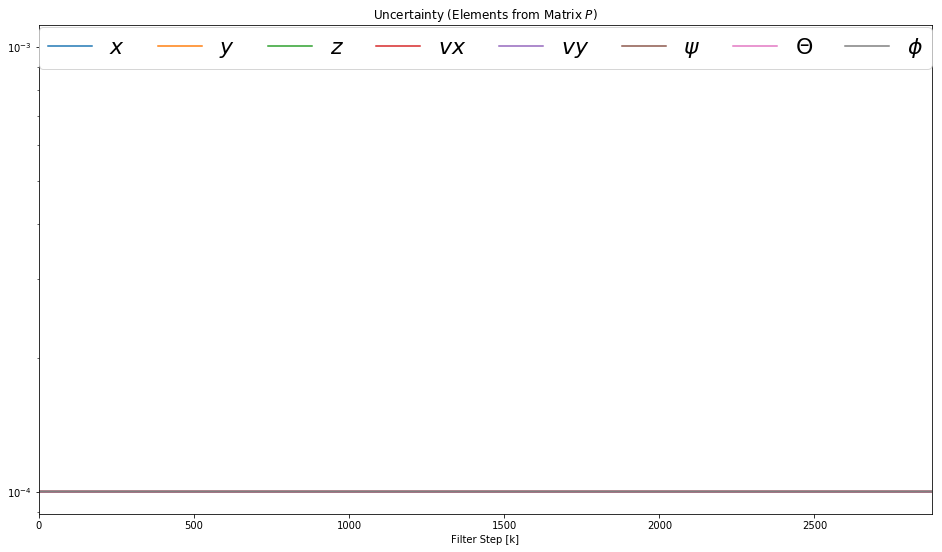

In [1001]:
m = ri 
fig = plt.figure(figsize=(16,9))
plt.semilogy(range(m),P0, label='$x$')
plt.step(range(m),P1, label='$y$')
plt.step(range(m),P2, label='$z$')
plt.step(range(m),P3, label='$vx$')
plt.step(range(m),P4, label='$vy$')
plt.step(range(m),P5, label='$\psi$')
plt.step(range(m),P6, label='$\Theta$')
plt.step(range(m),P7, label='$\phi$')

plt.xlabel('Filter Step [k]')
plt.ylabel('')
plt.xlim(0,ri)
plt.title('Uncertainty (Elements from Matrix $P$)')
#plt.legend(loc='best',prop={'size':22})
plt.legend(bbox_to_anchor=(0., 0.91, 1., .06), loc=3,
       ncol=9, mode="expand", borderaxespad=0.,prop={'size':22})
plt.savefig('Covariance-Matrix-Verlauf.eps', bbox_inches='tight')

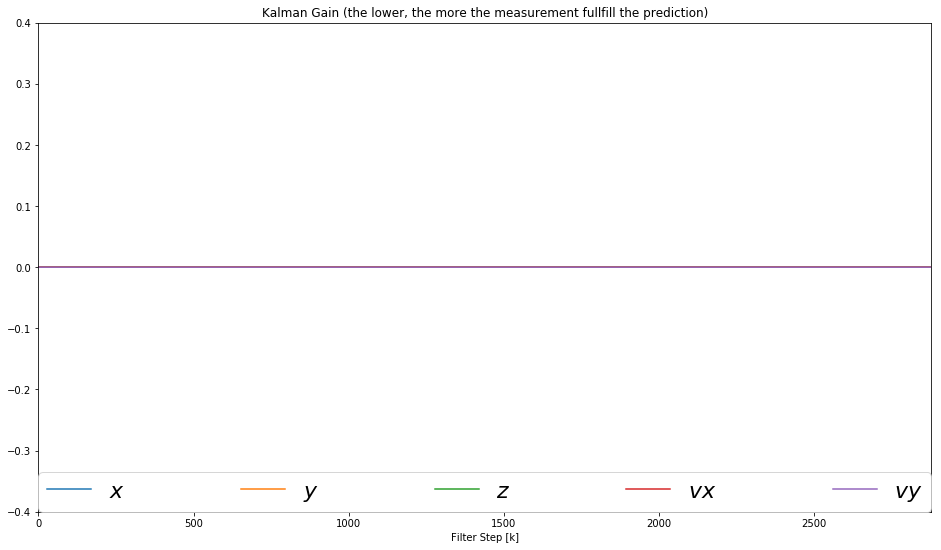

In [1002]:
fig = plt.figure(figsize=(16,9))
plt.step(range(ri),K0, label='$x$')
plt.step(range(ri),K1, label='$y$')
plt.step(range(ri),K2, label='$z$')
plt.step(range(ri),K3, label='$vx$')
plt.step(range(ri),K4, label='$vy$')

plt.xlabel('Filter Step [k]')
plt.ylabel('')
plt.xlim(0,ri)
plt.title('Kalman Gain (the lower, the more the measurement fullfill the prediction)')
#plt.legend(prop={'size':18})
plt.legend(bbox_to_anchor=(0., 0., 1., .102), loc=3,
       ncol=5, mode="expand", borderaxespad=0.,prop={'size':22})
plt.ylim([-0.4,0.4])

In [1003]:
## Process Noise Covarance Matrix Q